In [27]:
import numpy as np
import scipy
import sympy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as gr
import time

# Common methods and derivations from Integration rules

Consider the initial value problem (IVP) for the ordinary differential equation (ODE):
$$
\begin{align*}
y'(t) &= f(t,y(t)), \hspace{5mm} t_0 \leq t \leq T \\
y(t_0) &= y_0
\end{align*}
$$

Integrating both sides for $t \in [t_i, t_{i+1}] \subseteq [t_0,T]$, we obtain,
$$ y(t_{i+1})-y(t_i) = \int\limits_{t_i}^{t_{i+1}} f(s, y(s))ds $$

Using left endpoint rule for approximating the integral (using the notation $y(t_i)=y_i$), we obtain,
$$ y_{i+1}-y_i \approx (t_{i+1}-t_i)f(t_i,y_i) $$

# Forward Euler (using left endpoint)
From the above equation we can define the process of Forward Euler iteration as,
$$ y_{i+1} = y_i + \Delta t_i f(t_i,y_i), $$
where we obtain the $y$-value at $t_{i+1}$ using the $y$-value for the previous iteration, i.e., at the point $t_i$.

## Error of FE is $O(\Delta t)$

In [28]:
# Forward Euler itreative method
def forwardEuler(f,t,y0):
    n=len(t)
    y=np.zeros(n)
    y[0]=y0
    for i in range(n-1):
        y[i+1] = y[i] + (t[i+1]-t[i])*f(t[i],y[i])
    return y

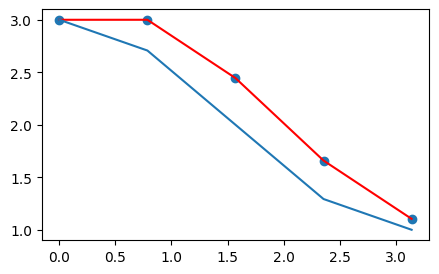

In [29]:
def func(t,y):
    return -np.sin(t)
t=np.linspace(0,np.pi,5)
y0=3
y=forwardEuler(func,t,y0)
plt.figure(figsize=(5,3))
plt.plot(t,y,'r')
plt.scatter(t,y)

y=np.cos(t)+2
plt.plot(t,y)

plt.show()

# Backward Euler (using right endpoint)
For each sub-interval, instead of left endpoint, if we approximate using right endpoint rule, we obtain,
$$ y_{i+1} = y_i + \Delta t_i f(t_i,y_{i+1}), $$
The difference with Forward Euler method is that, in order to obtain $y_{i+1}$ we have to solve the equation,
$$ y_{i+1} - y_i - \Delta t_i f(t_i,y_{i+1}) =0. $$

## Error of BE is $O(\Delta t)$

In [30]:
def backwardEuler(func,t,y0):
    n=len(t)
    y=np.zeros(n)
    y[0]=y0
    for i in range(n-1):
        f = lambda x : x - y[i] - (t[i+1]-t[i])*func(t[i+1],x)
        # Find a root of the function f using the Newton-Raphson
        # using initial guess y[i]
        y[i+1] = scipy.optimize.newton(f,y[i])
    return y

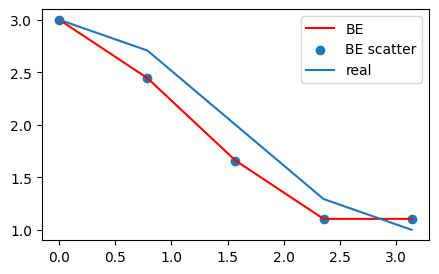

In [31]:

def func(t,y):
    return -np.sin(t)
t=np.linspace(0,np.pi,5)
y0=3
y=backwardEuler(func,t,y0)
plt.figure(figsize=(5,3))
plt.plot(t,y,'r')
plt.scatter(t,y)

y=np.cos(t)+2
plt.plot(t,y)

plt.legend(['BE','BE scatter','real'])
plt.show()

# Crank-Nicolson (using midpoint rule)
$$y_{i+1} = y_i + \Delta t f\left(\frac{t_{i+1}+t_i}{2},y\left(\frac{t_{i+1}+t_i}{2}\right)\right).$$
Note that,
$$y\left(\frac{t_{i+1}+t_i}{2}\right) = y\left( t_i+ \frac{\Delta t}{2} \right) = y_i + \frac{\Delta t}{2}\left(\frac{y_{i+1}-y_i}{\Delta t}\right)= \frac{y_{i+1}+y_i}{2}.$$
Hence,
$$y_{i+1} = y_i + \Delta t f\left(\frac{t_{i+1}+t_i}{2},\frac{y_{i+1}+y_i}{2}\right).$$

## Error of CN is $O(\Delta t^2)$

In [32]:
# Crank Nicolson
def crankNicolson(func,t,y0):
  n=len(t)
  y=np.zeros(n)
  y[0]=y0
  for i in range(n-1):
    f = lambda x : x - y[i] - (t[i+1]-t[i])*(func((t[i+1]+t[i])/2,(y[i]+x)/2))
    y[i+1]=scipy.optimize.newton(f,y[i])
  return y

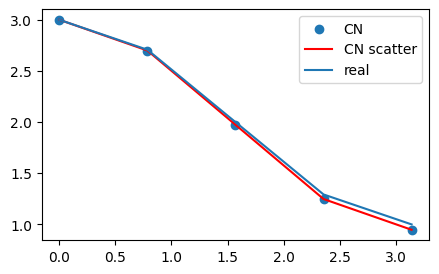

In [33]:
def func(time,y):
  return -np.sin(time)
t=np.linspace(0,np.pi,5)
y0=3
y=crankNicolson(func,t,y0)
plt.figure(figsize=(5,3))
plt.scatter(t,y)
plt.plot(t,y,'r')

y=np.cos(t)+2
plt.plot(t,y)

plt.legend(['CN','CN scatter','real'])
plt.show()

# Runge-Kutta 4
The last method is the fourth order Runge Kutta method, often called RK4. It is explicit and hence very fast, but it is significantly more accurate than the other methods above. It can have stability issues, however, it is very efficient when it works. It is the most commonly used ODE solver for IVPs. Its error is in the $O(\Delta t ^4)$.<br>
Using Simpson Quadrature rule we obtain:
$$
\begin{align*}
y_{i+1} &\approx y_i + (t_{i+1} - t_i)\Bigg(\frac{1}{6}f\big(t_i,y_i\big) + \frac{2}{3} f\bigg(\frac{t_{i+1}+t_i}{2}, y\Big(\frac{t_{i+1}+t_i}{2}\Big)\bigg) + \frac{1}{6}f\big(t_{i+1},y_{i+1}\big) \Bigg) \\
& \approx \Delta t \bigg(\frac{K_1}{6} + \frac{K_2}{3} + \frac{K_3}{3} + \frac{K_4}{6}\bigg).
\end{align*}
$$
Where,
$$
\begin{align*}
&K_1 = f(t_i,y_i).\\
& \\
&K_2 = f\bigg(t_i+\frac{\Delta t_i}{2}, y_i+\frac{\Delta t_i}{2} K_1\bigg)
\text{, which is obtained by approximating by left endpoint rule } \\ &\text{on the interval } \left[ t_i, t_i + \frac{\Delta t_i}{2} \right] \text{ so that ,}\\ & f\bigg(t_i + \frac{\Delta t_i}{2} , y\big(t_i+\frac{\Delta t_i}{2}\big) \bigg)\approx f\bigg(t_i+\frac{\Delta t_i}{2}, y_i+\frac{\Delta t_i}{2} f(t_i,y_i)\bigg) = f\bigg(t_i+\frac{\Delta t_i}{2}, y_i+\frac{\Delta t_i}{2} K_1\bigg).\\
& \\
\end{align*}
$$

$$
\begin{align*}
&K_3 = f\bigg(t_i+\frac{\Delta t_i}{2}, y_i+\frac{\Delta t_i}{2} K_2\bigg)
\text{, which is obtained by approximating by right endpoint } \\ &\text{on the interval } \left[t_i, t_i + \frac{\Delta t_i}{2} \right] \text{ so that ,}
\end{align*}
$$
$$
\begin{align*}
f\bigg(t_i + \frac{\Delta t_i}{2} , y\big(t_i+\frac{\Delta t}{2}\big) \bigg)&\approx f\Bigg(t_i + \frac{\Delta t_i}{2} , y_i + \frac{\Delta t_i}{2}f\Big(t_i+\frac{\Delta t}{2}, y\big(t_i + \frac{\Delta t_i}{2}\big)\Big)\Bigg)\\
&\approx f\Bigg(t_i + \frac{\Delta t_i}{2} , y_i + \frac{\Delta t_i}{2}f\Big(t_i+\frac{\Delta t}{2}, y_i + \frac{\Delta t_i}{2} K_1 \Big)\Bigg)\\
&\approx f\Bigg(t_i + \frac{\Delta t_i}{2} , y_i + \frac{\Delta t_i}{2}K_2\Bigg).
\end{align*}
$$

$$
\begin{align*}
&K_4 = f\big(t_i+\Delta t_i, y_i+\Delta t_i K_3\big)
\text{ which is obtained by the approximating by midpoint }\\ &\text{on the interval } \left[t_i, t_{i+1} \right] \text{ so that ,}
\end{align*}
$$
$$
\begin{align*}
f\big(t_{i+1}, y_{i+1}\big) &\approx f\Bigg(t_i + \Delta t_i , y_i + \Delta t_i f\Big(t_i+\frac{\Delta t}{2}, y\big(t_i + \frac{\Delta t_i}{2}\big)\Big)\Bigg)\\
& \approx f\big( t_i + \Delta t_i, y_i + \Delta t_i K_3)\big).\\
\end{align*}
$$

## Accuracy of RK4 is $O(\Delta t ^4)$

In [34]:
# RK4 (Runge Kutta)
def rk4(func,t,y0):
  n=len(t)
  y=np.zeros(n)
  y[0]=y0
  for i in range(n-1):
    dt = t[i+1]-t[i]
    k1 = func(t[i],y[i])
    k2 = func(t[i]+dt/2, y[i]+(dt/2)*k1)
    k3 = func(t[i]+dt/2, y[i]+(dt/2)*k2)
    k4 = func(t[i]+dt, y[i]+dt*k3)
    y[i+1] = y[i] + dt*(k1/6 + k2/3 + k3/3 + k4/6)
  return y

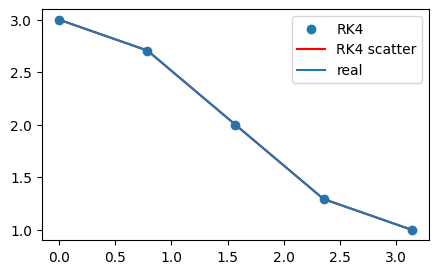

In [35]:
def func(time,y):
  return -np.sin(time)
t=np.linspace(0,np.pi,5)
y0=3
y=rk4(func,t,y0)
plt.figure(figsize=(5,3))
plt.scatter(t,y)
plt.plot(t,y,'r')

y=np.cos(t)+2
plt.plot(t,y)

plt.legend(['RK4','RK4 scatter','real'])
plt.show()

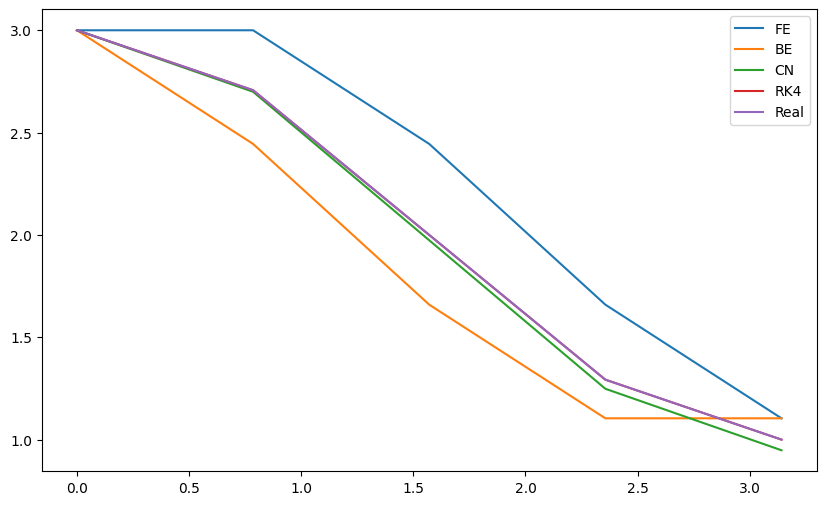

In [36]:
def func(time,y):
  return -np.sin(time)
t=np.linspace(0,np.pi,5)
y0=3

plt.figure(figsize=(10,6))

y=forwardEuler(func,t,y0)
#plt.scatter(t,y)
plt.plot(t,y)

y=backwardEuler(func,t,y0)
#plt.scatter(t,y)
plt.plot(t,y)

y=crankNicolson(func,t,y0)
#plt.scatter(t,y)
plt.plot(t,y)

y=rk4(func,t,y0)
#plt.scatter(t,y)
plt.plot(t,y)

yReal = np.cos(t)+2
#plt.scatter(t,y)
plt.plot(t,y)

plt.legend(['FE','BE','CN','RK4','Real'])

plt.show()

# Comparison of speed between implicit and explicit solvers

$$y'(t)=-1.2 y + 7 e^{-0.3 t}, \;\; y(0)=3, \;\; 0 \leq t \leq 2.5=T$$

The true solution is given by
$$y(t) = \frac{70}{9} e^{-0.3 t} - \frac{43}{9} e^{-1.2 t}$$

Time elapsed for FE : 0.010575532913208008
Time elapsed for BE : 0.08439302444458008
Time elapsed for CN : 0.075042724609375
Time elapsed for RK4 : 0.009266853332519531


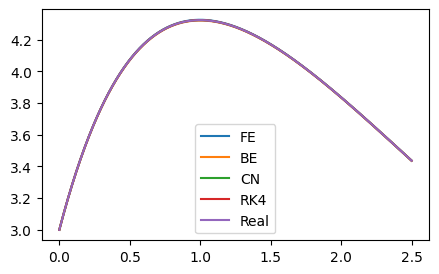

In [37]:
def func(t,y):
  return -1.2*y+7*np.exp(-0.3*t)
t=np.linspace(0,2.5,1001)
y0=3

plt.figure(figsize=(5,3))

tim=time.time()
y=forwardEuler(func,t,y0)
print("Time elapsed for FE :",time.time()-tim)
plt.plot(t,y)

tim=time.time()
y=backwardEuler(func,t,y0)
print("Time elapsed for BE :",time.time()-tim)
plt.plot(t,y)

tim=time.time()
y=crankNicolson(func,t,y0)
print("Time elapsed for CN :",time.time()-tim)
plt.plot(t,y)

tim=time.time()
y=rk4(func,t,y0)
print("Time elapsed for RK4 :",time.time()-tim)
plt.plot(t,y)

yReal = (70/9)*np.exp(-0.3*t)-(43/9)*np.exp(-1.2*t)
plt.plot(t,y)

plt.legend(['FE','BE','CN','RK4','Real'])
plt.show()

The implicit methods are significantly slower.

# Accuracy

We compute the errors for each method with
$$ \Delta t = T/10,T/20,T/40,T/80.$$
The error is defined as
$$ err = \max\limits_{i=1,2,\cdots, n} \left| y_{true}(t_i) - y_i \right|$$

In [38]:
def func(t,y):
  return -1.2*y+7*np.exp(-0.3*t)
y0=3

def trueSolution(t):
  return (70/9)*np.exp(-0.3*t)-(43/9)*np.exp(-1.2*t)

nPoints = [11,21,41,81]

print('Forward Euler')
errFE=[]
for i in nPoints:
  t=np.linspace(0,2.5,i)
  y=forwardEuler(func,t,y0)
  yTrue = trueSolution(t)
  err = np.linalg.norm(y-yTrue, np.inf)
  errFE.append(err)
  print('dt = T /',i, '    error = ',err)

print('\nBackward Euler')
errBE = []
for i in nPoints:
  t=np.linspace(0,2.5,i)
  y=backwardEuler(func,t,y0)
  yTrue = trueSolution(t)
  err = np.linalg.norm(y-yTrue, np.inf)
  errBE.append(err)
  print('dt = T /',i, '    error = ',err)

print('\nCrank-Nicolson')
errCN = []
for i in nPoints:
  t=np.linspace(0,2.5,i)
  y=crankNicolson(func,t,y0)
  yTrue = trueSolution(t)
  err = np.linalg.norm(y-yTrue, np.inf)
  errCN.append(err)
  print('dt = T /',i, '    error = ',err)

print('\nRunge Kutta')
errRK4=[]
for i in nPoints:
  t=np.linspace(0,2.5,i)
  y=rk4(func,t,y0)
  yTrue = trueSolution(t)
  err = np.linalg.norm(y-yTrue, np.inf)
  errRK4.append(err)
  print('dt = T /',i, '    error = ',err)

Forward Euler
dt = T / 11     error =  0.2610425134618142
dt = T / 21     error =  0.12045756576442734
dt = T / 41     error =  0.05804152341495605
dt = T / 81     error =  0.028515985333185334

Backward Euler
dt = T / 11     error =  0.197506993265816
dt = T / 21     error =  0.10492543978986024
dt = T / 41     error =  0.054231739449569716
dt = T / 81     error =  0.02757106083006633

Crank-Nicolson
dt = T / 11     error =  0.01061003789301651
dt = T / 21     error =  0.002630318905069373
dt = T / 41     error =  0.0006562104829574977
dt = T / 81     error =  0.0001639673149265164

Runge Kutta
dt = T / 11     error =  0.0001280415537845414
dt = T / 21     error =  7.004976423807818e-06
dt = T / 41     error =  4.096745387371925e-07
dt = T / 81     error =  2.4773068929562214e-08


Recall:
$$ err = O(\Delta t ^k)$$
means
$$ k \approx \frac{\log{\frac{e_1}{e_2}}}{\log{\frac{\Delta t_1}{\Delta t_2}}}$$

In [40]:
print('k for FE: ', np.log(errFE[-1]/errFE[-2])/(np.log((1/nPoints[-1])/(1/nPoints[-2]))))
print('k for BE: ', np.log(errBE[-1]/errBE[-2])/(np.log((1/nPoints[-1])/(1/nPoints[-2]))))
print('k for CN: ', np.log(errCN[-1]/errCN[-2])/(np.log((1/nPoints[-1])/(1/nPoints[-2]))))
print('k for RK4: ', np.log(errRK4[-1]/errRK4[-2])/(np.log((1/nPoints[-1])/(1/nPoints[-2]))))

k for FE:  1.043791704824005
k for BE:  0.9935708598712533
k for CN:  2.036805924917588
k for RK4:  4.120576170390032
